In [1]:
import sys

sys.path.append("../src")

In [2]:
import os
from collections import defaultdict

import matplotlib.pyplot as plt
from IPython.display import display

from experiments.dataset_analyzer import DatasetAnalyzer
from experiments.dataset_statistics import *
from utils import *

%matplotlib inline

In [3]:
paths = Paths("../configs/paths.json")

# Dataset Statistics

In [4]:
base_path = "../data/Dataset"
stats = DatasetStats(base_path)

## OBS

In [5]:
# obs_stats = stats.get_obs_stats()
# obs_stats.to_csv("../results/stats/obs.csv", index=None)
obs_stats = pd.read_csv("../results/stats/obs.csv")
obs_stats

,Participant,Game,Duration,Frames,Engagement,Interest,Stress,Excitement
0,183,FIFA23,205.04,6151,4,2,2,1
1,183,FIFA23,73.04,2191,4,2,2,1
2,183,FIFA23,57.05,1711,3,2,1,0
3,183,FIFA23,64.03,1920,3,3,1,1
4,183,FIFA23,56.03,1680,3,2,1,1
...,...,...,...,...,...,...,...,...
895,458,Street Fighter V,43.05,1291,3,3,0,2
896,458,Street Fighter V,29.05,871,3,2,0,2
897,458,Street Fighter V,42.03,1260,2,3,1,1
898,458,Street Fighter V,40.05,1201,3,3,0,1


## Survey Stats

In [5]:
survey_stats = stats.submissions_df.merge(stats.participants_df)
survey_stats.to_csv("../results/stats/survey.csv", index=None)
# survey_stats = pd.read_csv("../results/stats/survey.csv")
survey_stats = survey_stats.rename(
    columns={
        "engagement": "Engagement",
        "stress": "Stress",
        "excitement": "Excitement",
        "interest": "Interest",
    }
)
# for m in ["Engagement", "Stress","Excitement", "Interest"]:
#     survey_stats[m] = survey_stats[m].map({0:"0-1", 1:"0-1", 2:"2", 3:"3-4", 4:"3-4"})
survey_stats["Duration"] = (
    survey_stats.end_ts - survey_stats.start_ts
).dt.total_seconds()
survey_stats

,submission_id,participant_id,game,difficulty,session_no,start_ts,end_ts,Engagement,Interest,Stress,Excitement,age,sex,fifa_exp,sf_exp,Duration
0,39,183,FIFA23,World Class,1,2023-10-23 11:34:04-04:00,2023-10-23 11:37:29-04:00,4,2,2,1,26,M,1,0,205.0
1,40,183,FIFA23,World Class,2,2023-10-23 11:38:12-04:00,2023-10-23 11:39:25-04:00,4,2,2,1,26,M,1,0,73.0
2,41,183,FIFA23,Semi-Pro,1,2023-10-23 11:45:34-04:00,2023-10-23 11:46:31-04:00,3,2,1,0,26,M,1,0,57.0
3,42,183,FIFA23,Semi-Pro,2,2023-10-23 11:46:55-04:00,2023-10-23 11:47:59-04:00,3,3,1,1,26,M,1,0,64.0
4,43,183,FIFA23,Legendary,1,2023-10-23 11:49:29-04:00,2023-10-23 11:50:25-04:00,3,2,1,1,26,M,1,0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,974,458,Street Fighter V,(1),2,2023-11-13 15:24:16-05:00,2023-11-13 15:24:59-05:00,3,3,0,2,26,M,1,1,43.0
896,975,458,Street Fighter V,(1),3,2023-11-13 15:25:18-05:00,2023-11-13 15:25:47-05:00,3,2,0,2,26,M,1,1,29.0
897,976,458,Street Fighter V,(2),1,2023-11-13 15:26:37-05:00,2023-11-13 15:27:19-05:00,2,3,1,1,26,M,1,1,42.0
898,977,458,Street Fighter V,(2),2,2023-11-13 15:27:40-05:00,2023-11-13 15:28:20-05:00,3,3,0,1,26,M,1,1,40.0


In [6]:
def plot_engagement_distribution(survey_stats):
    # Calculate mean and std per participant
    engagement_stats = (
        survey_stats.groupby("participant_id")["Engagement"]
        .agg(["mean", "std"])
        .reset_index()
    )
    engagement_stats["std"] = engagement_stats["std"].fillna(0)

    # Sort by participant_id
    engagement_stats = engagement_stats.sort_values("participant_id")

    fig, ax = plt.subplots(figsize=(11, 5))
    x = np.arange(len(engagement_stats))
    ax.axhline(y=survey_stats.Engagement.mean(), label="Mean Engagement", color="red")
    # Plot bar chart with error bars
    ax.bar(
        x,
        engagement_stats["mean"],
        yerr=engagement_stats["std"],
        capsize=5,
        color="skyblue",
        alpha=0.7,
    )

    # Customize plot
    ax.set_xlabel("Participant ID", fontsize=20)
    ax.set_ylabel("Mean Engagement Level", fontsize=20)
    ax.set_yticks(np.arange(5))
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)
    ax.set_xticks(x)
    ax.set_xticklabels(engagement_stats["participant_id"], rotation=45)
    # ax.set_ylim(0, 4)
    ax.grid(True, linestyle="--", alpha=0.7)
    plt.legend(fontsize=22)
    plt.tight_layout()
    plt.savefig("../results/figures/participant_means_bar.pdf")
    return fig

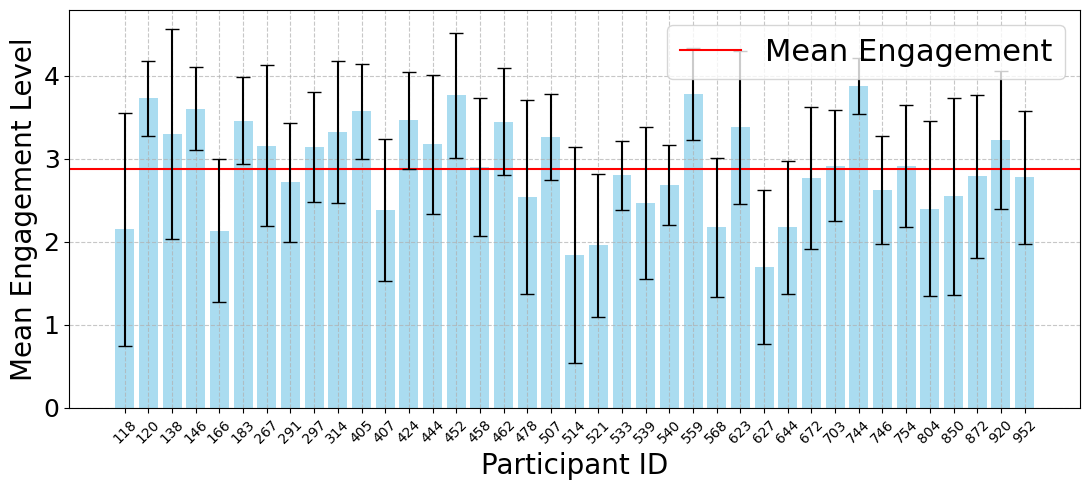

In [7]:
import numpy as np

plot_engagement_distribution(survey_stats);

In [12]:
def plot_participant_metrics_heatmap(survey_stats):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Calculate mean per participant and metric
    metrics = ["Engagement", "Interest", "Stress", "Excitement"]
    heatmap_data = (
        survey_stats.groupby(["participant_id", "game"])[metrics].mean().reset_index()
    )

    # Pivot data for heatmap format
    heatmap_matrix = heatmap_data.pivot_table(index="participant_id", values=metrics)

    # Create heatmap
    fig, ax = plt.subplots(figsize=(11, 14))
    sns.heatmap(heatmap_matrix, cmap="Greens", vmin=0, vmax=4, annot=True, fmt=".2f")
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    cbar.set_label("Score Level", size=20)
    # plt.title('Mean Metrics per Participant', pad=20, fontsize=24)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
    ax.set_ylabel("Participant", fontsize=20)
    plt.tight_layout()
    plt.savefig("../results/figures/participant_means.pdf")
    return fig

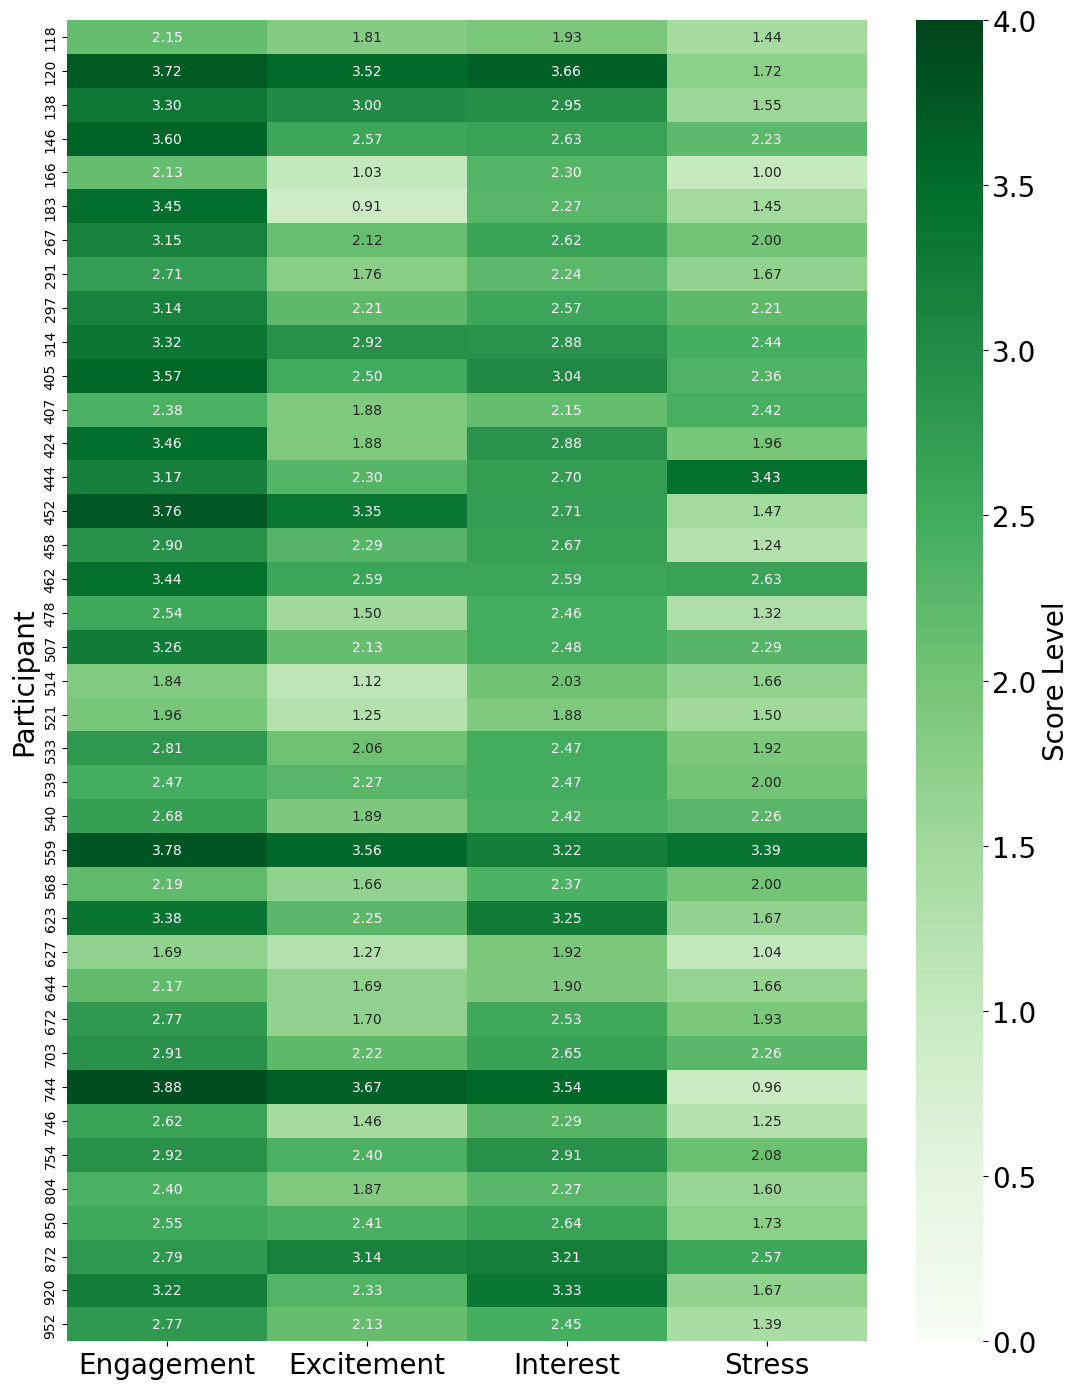

In [13]:
plot_participant_metrics_heatmap(survey_stats);

### Correlation between Engagement Metrics

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats


def correlation_matrix_with_pvalues(df, columns):
    n = len(columns)
    corr_matrix = np.zeros((n, n))
    pval_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            corr, pval = stats.spearmanr(df[columns[i]], df[columns[j]])
            corr_matrix[i, j] = corr
            pval_matrix[i, j] = pval

    return corr_matrix, pval_matrix


def plot_corr_heatmap(df, columns):
    corr_matrix, pval_matrix = correlation_matrix_with_pvalues(df, columns)

    # Create annotations with correlations and p-values
    annotations = np.array(
        [
            [f"{corr:.2f}\n(p={pval:.3f})" for corr, pval in zip(row_corr, row_pval)]
            for row_corr, row_pval in zip(corr_matrix, pval_matrix)
        ]
    )

    plt.figure(figsize=(5, 4))
    sns.heatmap(
        corr_matrix,
        annot=annotations,
        fmt="",
        cmap="RdBu_r",
        vmin=-1,
        vmax=1,
        xticklabels=columns,
        yticklabels=columns,
    )
    # plt.title('Spearman Correlation Heatmap with P-values')
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.tight_layout()
    plt.savefig("../results/figures/metrics_correlation.pdf")
    plt.show()

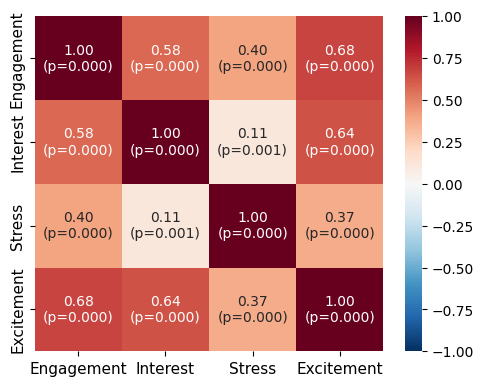

In [52]:
plot_corr_heatmap(survey_stats, ["Engagement", "Interest", "Stress", "Excitement"])

## Eyetracker Stats

In [7]:
# eye_stats = stats.get_eye_tracking_stats()
# eye_stats.to_csv("../results/stats/eye.csv", index=None)
eye_stats = pd.read_csv("../results/stats/eye.csv")
eye_stats

,Participant,Game,NumPoints,ValidFixationPoints,ValidLeftPoints,ValidRightPoints,Engagement,Interest,Stress,Excitement
0,183.0,FIFA23,12478.0,12478.0,12478.0,12478.0,4.0,2.0,2.0,1.0
1,183.0,FIFA23,4444.0,4444.0,4444.0,4444.0,4.0,2.0,2.0,1.0
2,183.0,FIFA23,3469.0,3469.0,3469.0,3469.0,3.0,2.0,1.0,0.0
3,183.0,FIFA23,3896.0,3896.0,3896.0,3896.0,3.0,3.0,1.0,1.0
4,183.0,FIFA23,3408.0,3408.0,3408.0,3408.0,3.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
895,458.0,Street Fighter V,2618.0,2618.0,2618.0,2618.0,3.0,3.0,0.0,2.0
896,458.0,Street Fighter V,1765.0,1765.0,1765.0,1765.0,3.0,2.0,0.0,2.0
897,458.0,Street Fighter V,2556.0,2556.0,2556.0,2556.0,2.0,3.0,1.0,1.0
898,458.0,Street Fighter V,2435.0,2435.0,2435.0,2435.0,3.0,3.0,0.0,1.0


## Heart Rate Stats

In [8]:
# hr_stats = stats.get_hr_stats().dropna()
# hr_stats.to_csv("../results/stats/hr.csv", index=None)
hr_stats = pd.read_csv("../results/stats/hr.csv")
hr_stats

,Participant,Game,NumPoints,MeanConf,VarBPM,Engagement,Interest,Stress,Excitement
0,297,FIFA23,13,1.000000,13.589744,3,3,2,1
1,297,FIFA23,15,1.000000,5.123810,2,2,1,2
2,297,FIFA23,34,1.000000,18.122103,4,3,3,3
3,297,FIFA23,9,0.777778,3.500000,3,2,3,2
4,297,FIFA23,16,1.062500,2.162500,3,3,2,2
...,...,...,...,...,...,...,...,...,...
525,458,Street Fighter V,8,1.000000,1.714286,3,3,0,2
526,458,Street Fighter V,4,1.000000,0.916667,3,2,0,2
527,458,Street Fighter V,7,1.000000,16.619048,2,3,1,1
528,458,Street Fighter V,6,1.000000,6.700000,3,3,0,1


# Gamepad Stats

In [9]:
# xbox_stats = stats.get_xbox_stats()
# xbox_stats.to_csv("../results/stats/xbox.csv", index=None)
xbox_stats = pd.read_csv("../results/stats/xbox.csv")
xbox_stats

,Participant,Game,NumPoints,NumBtnEvents,NumAnalogEvents,Engagement,Interest,Stress,Excitement
0,183.0,FIFA23,2733.0,319.0,2414.0,4.0,2.0,2.0,1.0
1,183.0,FIFA23,984.0,126.0,858.0,4.0,2.0,2.0,1.0
2,183.0,FIFA23,935.0,92.0,843.0,3.0,2.0,1.0,0.0
3,183.0,FIFA23,886.0,72.0,814.0,3.0,3.0,1.0,1.0
4,183.0,FIFA23,705.0,93.0,612.0,3.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
895,458.0,Street Fighter V,523.0,124.0,399.0,3.0,3.0,0.0,2.0
896,458.0,Street Fighter V,427.0,132.0,295.0,3.0,2.0,0.0,2.0
897,458.0,Street Fighter V,793.0,232.0,561.0,2.0,3.0,1.0,1.0
898,458.0,Street Fighter V,739.0,199.0,540.0,3.0,3.0,0.0,1.0


## EEG Stats

In [10]:
# eeg_stats = stats.get_eeg_stats()
# eeg_stats.to_csv("../results/stats/eeg.csv", index=None)
eeg_stats = pd.read_csv("../results/stats/eeg.csv")
eeg_stats

,Participant,Game,MeanQuality,StdQuality,Raw_NumPoints,Band_NumPoints,PM_NumPoints,Engagement,Interest,Stress,Excitement
0,183,FIFA23,87.073170,22.469093,26254,1641,20,4,2,2,1
1,183,FIFA23,85.844749,26.029932,9349,584,8,4,2,2,1
2,183,FIFA23,90.570175,17.547280,7300,456,5,3,2,1,0
3,183,FIFA23,93.750000,16.732155,8197,513,6,3,3,1,1
4,183,FIFA23,76.264881,25.092667,7172,448,6,3,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
895,458,Street Fighter V,61.337209,21.802470,5506,344,4,3,3,0,2
896,458,Street Fighter V,29.597701,16.309956,3714,232,3,3,2,0,2
897,458,Street Fighter V,42.658730,22.754023,5379,336,4,2,3,1,1
898,458,Street Fighter V,52.500000,28.326507,5122,320,4,3,3,0,1


### Self-reported vs. EEG-based Metrics

In [186]:
root = Path("../data/Dataset/Samples/")

metrics = ["Engagement", "Interest", "Stress", "Excitement"]


def step(f):
    eeg_df = pd.read_csv(f)
    eeg_df = eeg_df[[f"PM.{m}.Scaled" for m in metrics]].dropna()
    pm_scores = [eeg_df[f"PM.{m}.Scaled"].dropna().mean() for m in metrics]
    return [int(f.stem.split("_")[1])] + pm_scores


data = Parallel(n_jobs=-1)(
    delayed(step)(f) for f in tqdm(root.glob("*/EEG/*.csv"), leave=False)
)
eeg_scores_df = pd.DataFrame(data, columns=["submission_id"] + metrics)
# temp = eeg_scores_df.explode("Engagement")
# for m in ["Interest", "Stress", "Excitement"]:
#     temp = temp.assign(**{m: eeg_scores_df.explode(m)[m].values})
# eeg_scores_df = temp
eeg_scores_df

0it [00:00, ?it/s]

,submission_id,Engagement,Interest,Stress,Excitement
0,835,0.620688,0.458980,0.428037,0.330166
1,839,0.643119,0.482407,0.441156,0.242036
2,840,0.607341,0.477890,0.445909,0.492265
3,829,0.673658,0.492261,0.438806,0.221510
4,831,0.688073,0.500203,0.445682,0.286623
...,...,...,...,...,...
895,886,0.676152,0.551652,0.426018,0.229218
896,869,0.667841,0.435162,0.374238,0.225192
897,876,0.671882,0.480745,0.403416,0.199676
898,870,0.685940,0.423688,0.379648,0.406917


In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def plot_correlations(eeg_scores_df, survey_stats):
   # Merge dataframes on submission_id
   merged_df = pd.merge(eeg_scores_df, survey_stats, 
                       on='submission_id', 
                       suffixes=('_eeg', '_survey')).dropna()
   
   # Initialize correlation matrix
   columns = ["Engagement", "Interest", "Stress", "Excitement"]
   corr_matrix = pd.DataFrame(index=columns, columns=["correlation", "pvalue"])
   
   # Calculate correlations
   for col in columns:
       correlation, pvalue = stats.spearmanr(
           merged_df[f"{col}_eeg"], 
           merged_df[f"{col}_survey"]
       )
       corr_matrix.loc[col] = [correlation, pvalue]

   return corr_matrix

In [193]:
print(plot_correlations(eeg_scores_df, survey_stats))

           correlation    pvalue
Engagement    0.075839  0.022965
Interest      0.003257  0.922316
Stress        0.089124  0.007499
Excitement   -0.113125  0.000679


# Calculate mean engagement score

In [165]:
pid_to_class = defaultdict(lambda: [0] * 5)
for file in paths["DataRoot"].glob("*/OBS/*.mp4"):
    parts = file.stem.split("_")
    pid = parts[0]
    label = parts[2]
    pid_to_class[int(pid)][int(label)] += 1

In [167]:
data = (
    pd.DataFrame(pid_to_class)
    .sum(axis=1)
    .reset_index()
    .rename(columns={"index": "EngagementScore", 0: "Count"})
)
(data["EngagementScore"] * data["Count"]).sum() / data["Count"].sum()

2.871111111111111

## Per inner fold's

In [168]:
data = []
for fold in Path("../configs/splits/").glob("fold_*/"):
    for inner_fold in fold.glob("*.csv"):
        df = pd.read_csv(inner_fold)
        result = pd.DataFrame(df.ParticipantId.map(pid_to_class).to_list())
        result.insert(0, "Split", df.Split)
        result.insert(0, "inner_fold", inner_fold.stem)
        result.insert(0, "outer_fold", fold.stem)
        data.append(result)
label_counts = pd.concat(data, ignore_index=True)
label_counts

,outer_fold,inner_fold,Split,0,1,2,3,4
0,fold_0,4,train,0,0,1,10,17
1,fold_0,4,train,0,0,3,12,0
2,fold_0,4,train,0,0,2,3,4
3,fold_0,4,train,0,1,0,1,15
4,fold_0,4,train,0,0,6,13,4
...,...,...,...,...,...,...,...,...
1696,fold_4,1,test,0,0,0,3,21
1697,fold_4,1,test,0,0,6,13,0
1698,fold_4,1,test,0,1,4,4,15
1699,fold_4,1,test,0,2,4,8,12


In [169]:
agg_label_counts = (
    label_counts[label_counts.Split == "train"]
    .groupby(["outer_fold", "inner_fold"])[[0, 1, 2, 3, 4]]
    .sum()
)

weights = pd.to_numeric(agg_label_counts.columns)
weighted_sum = (agg_label_counts * weights).sum(axis=1)
mean_eng_score = weighted_sum / agg_label_counts.sum(axis=1)
mean_eng_score.describe()

count    49.000000
mean      2.910768
std       0.059900
min       2.779287
25%       2.871087
50%       2.916201
75%       2.947559
max       3.051756
dtype: float64

In [170]:
# [label_counts.Split=="validation"]
g = label_counts.groupby(["outer_fold", "inner_fold", "Split"])
low_g = g[[0, 1, 2]].sum().sum(axis=1).to_frame().rename(columns={0: "Low"})
high_g = g[[3, 4]].sum().sum(axis=1).to_frame().rename(columns={0: "High"})
label_counts_per_fold_split = pd.concat((low_g, high_g), axis=1)
label_counts_per_fold_split.describe()

,Low,High
count,147.000000,147.000000
mean,73.761905,193.380952
std,60.893499,162.731072
min,7.000000,22.000000
25%,26.000000,75.500000
50%,43.000000,91.000000
75%,143.000000,400.000000
max,194.000000,517.000000


In [171]:
analyzer = DatasetAnalyzer(
    dataset_root=paths["FeaturesRoot"],
    splits_root=paths["SplitsRoot"],
)

## Overall Dataset Statistics
Get class distribution summary across all participants

,Total Participants,Total Videos,Class 0 Videos,Class 1 Videos,Class Distribution (% Class 1)
0,38,873,253,620,71.019473


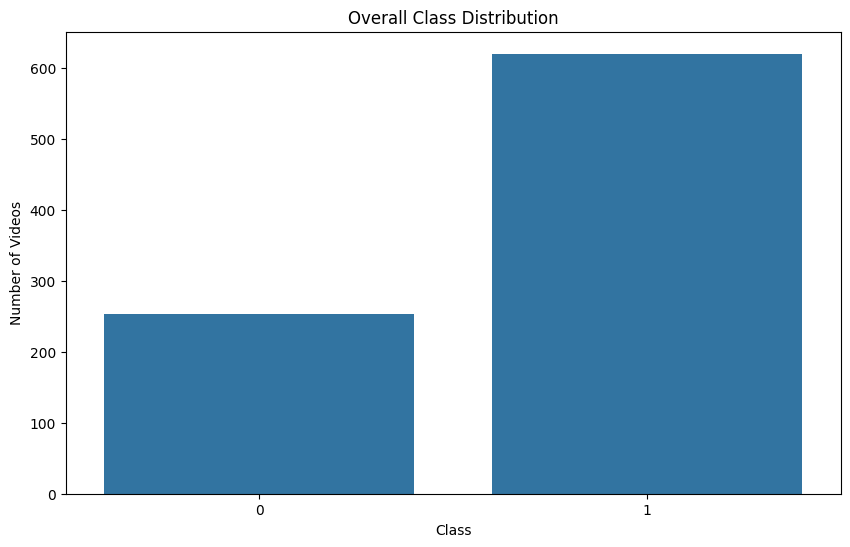

In [178]:
from IPython.display import display

display(analyzer.overall_statistics())
analyzer.visualize_overall_distribution()
plt.show()

## Participant-Level Analysis
Get detailed participant statistics

,Total Videos,Class 0 Videos,Class 1 Videos,Class Distribution (% Class 1)
count,38.000000,38.000000,38.000000,38.000000
mean,22.973684,6.657895,16.315789,72.024899
std,6.047054,6.099518,6.698549,21.802758
min,9.000000,0.000000,5.000000,20.833333
25%,19.250000,2.000000,11.000000,60.178571
50%,24.000000,6.000000,16.000000,74.053296
75%,27.750000,8.750000,19.750000,90.598291
max,32.000000,22.000000,30.000000,100.000000


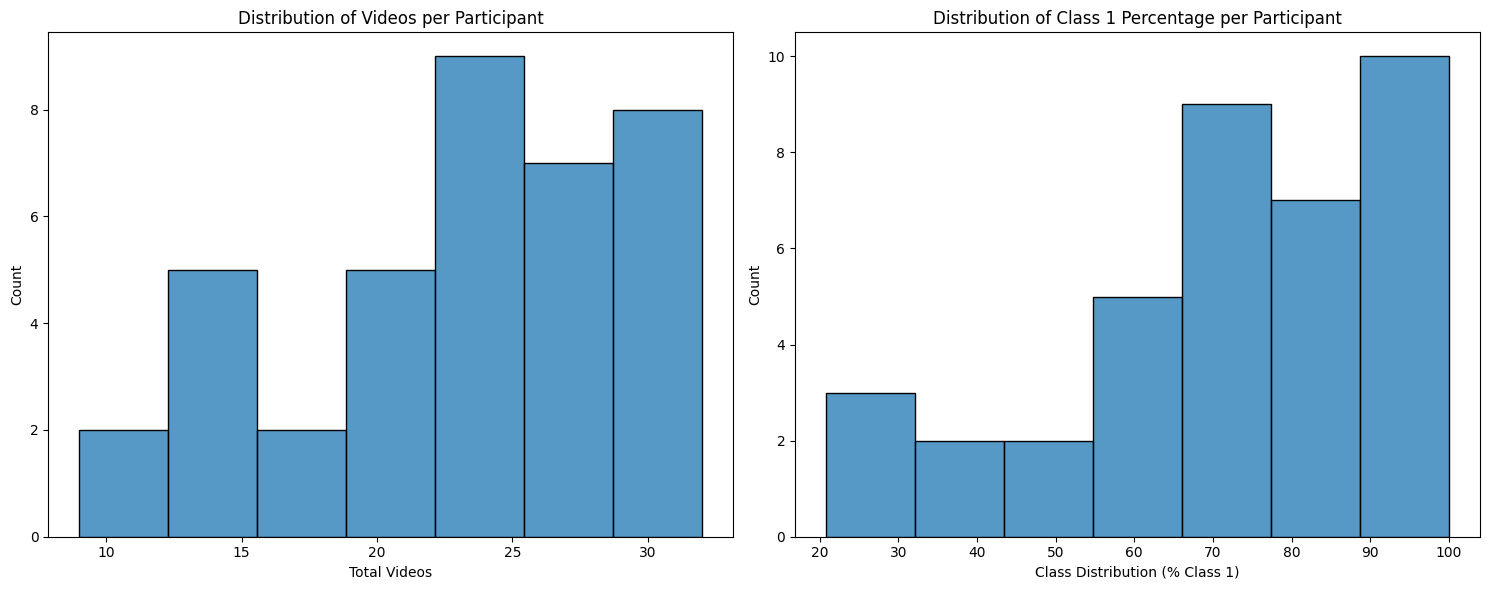

In [179]:
participant_stats = analyzer.participant_statistics()
display(participant_stats.describe())
analyzer.visualize_participant_distributions()
plt.show()

# Fold-Split Analysis

In [180]:
fold_stats = analyzer.analyze_fold_distributions()
analysis_df = analyzer.get_fold_analysis_df(fold_stats)

In [181]:
analysis_df.groupby(["split_type", "stat_type"])[
    [
        "n_participants",
        "total_samples",
        "class_0_samples",
        "class_1_samples",
        "class_1_ratio",
    ]
].mean()

n_participants  total_samples  class_0_samples  \
split_type stat_type                                                   
test       50%              5.571429     124.714286        36.142857   
           max              5.571429     124.714286        36.142857   
           mean             5.571429     124.714286        36.142857   
           min              5.571429     124.714286        36.142857   
           std              0.000000       0.000000         0.000000   
train      50%             25.000000     555.000000       150.714286   
           max             25.857143     587.000000       162.000000   
           mean            24.979592     557.632653       148.408163   
           min             23.857143     527.714286       130.714286   
           std              0.699327      20.931616        11.207209   
validation 50%              4.142857      95.571429        22.428571   
           max              5.285714     122.857143        42.428571   
           mean             4.163265      92.938776        24.734694   
           min              3.285714      63.571429        11.142857   
           std              0.699327      20.931616        11.207209   

                      class_1_samples  class_1_ratio  
split_type stat_type                                  
test       50%              88.571429       0.708918  
           max              88.571429       0.708918  
           mean             88.571429       0.708918  
           min              88.571429       0.708918  
           std               0.000000       0.000000  
train      50%             408.285714       0.731251  
           max             438.571429       0.763726  
           mean            409.224490       0.733819  
           min             381.428571       0.707390  
           std              20.103820       0.019267  
validation 50%              69.142857       0.748724  
           max              96.000000       0.882579  
           mean             68.204082       0.729755  
           min              38.857143       0.533879  
           std              20.103820       0.122012

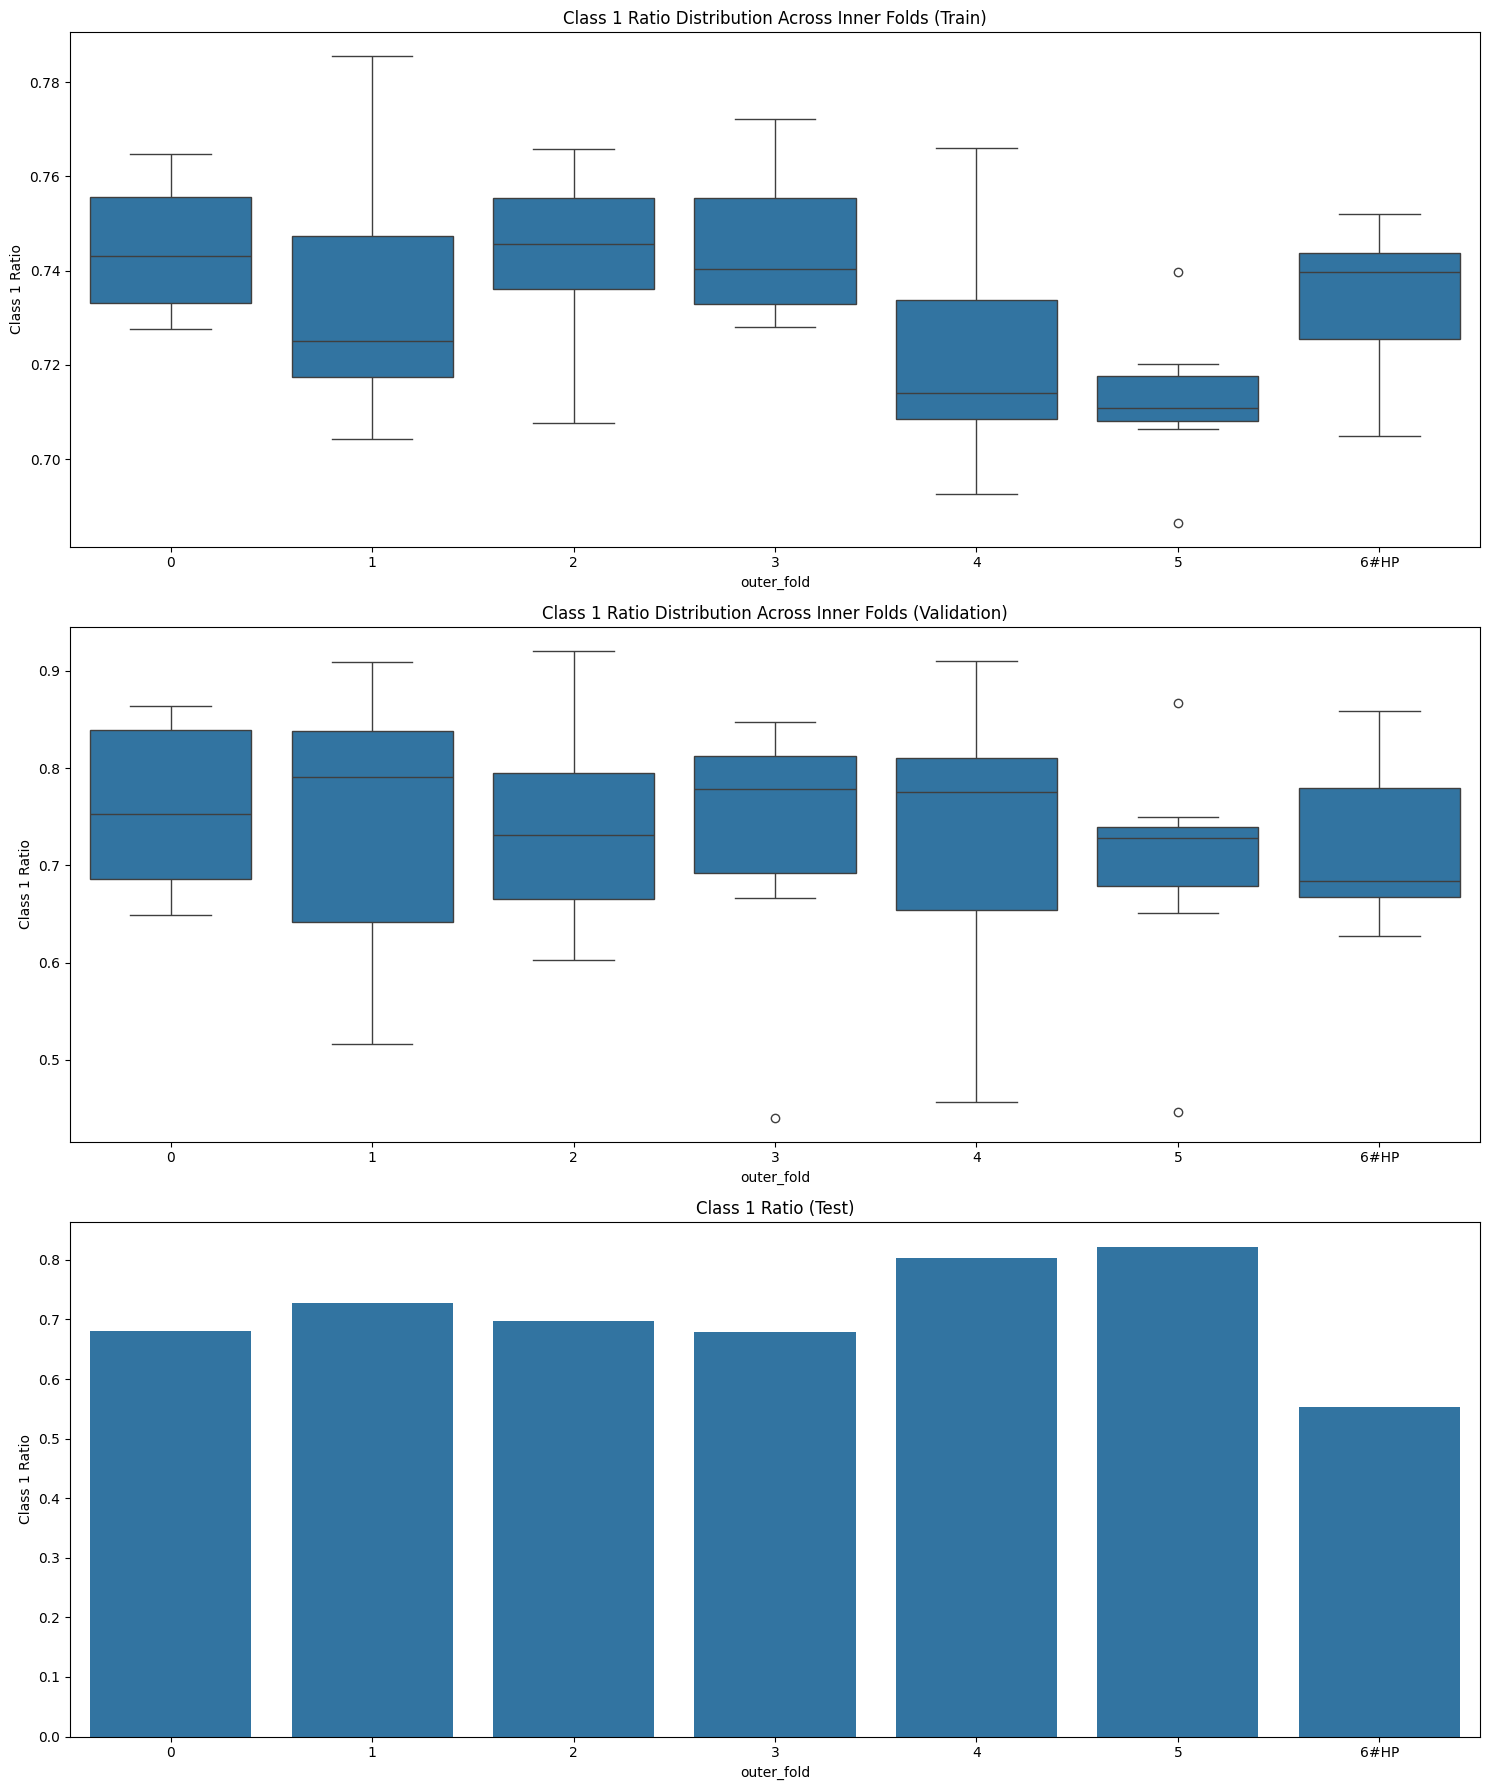

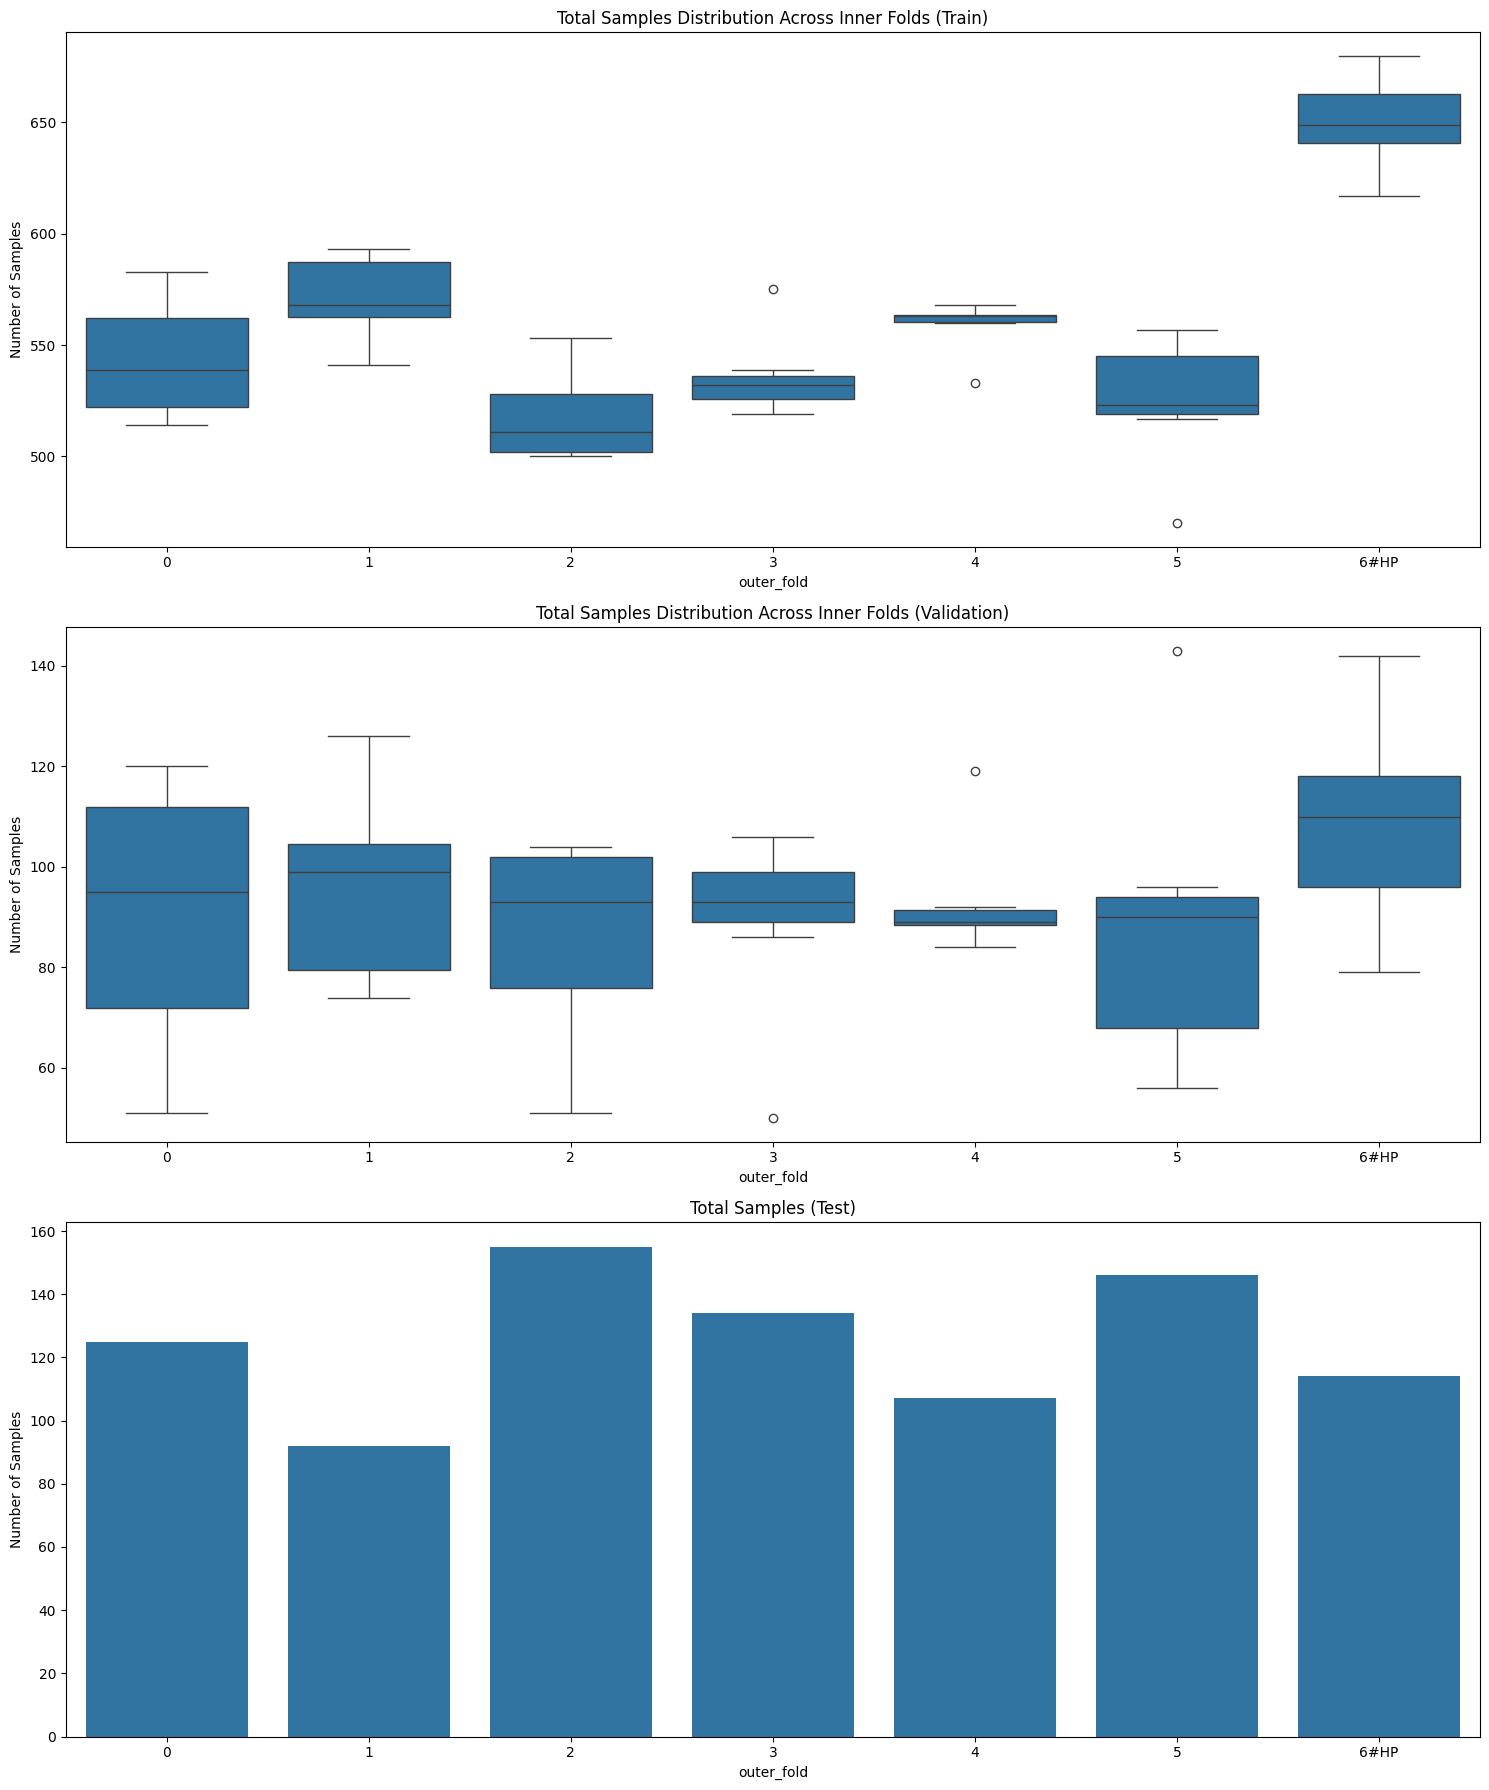

In [182]:
figures = analyzer.visualize_fold_distributions(fold_stats)